In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

In [3]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
##Preparing the engine
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
##Preparing the base
Base = automap_base()
Base.prepare(engine, reflect=True)

In [6]:
##Finding the keys
Base.classes.keys()

['measurement', 'station']

In [7]:
## Applying references
Station = Base.classes.station
Measurement = Base.classes.measurement

In [8]:
##Creating the session
session = Session(engine)

In [9]:
# Exploratory Precipitation Analysis

In [10]:
##Locating the most recent date
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

Query Date:  2016-08-23


Text(0, 0.5, 'Precipitation')

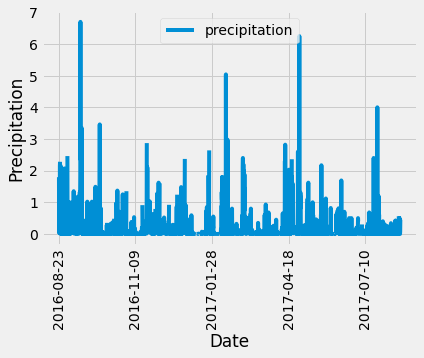

In [11]:
##Calculating query date
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Query Date: ", query_date)

results1= session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= query_date).all()

##Setting Pandas Data Frame and Bar Graph
df = pd.DataFrame(results1, columns=['date', 'precipitation'])

group_df = df.sort_values("date")

group_df.plot(x='date',y='precipitation', rot=90)
plt.xlabel("Date")
plt.ylabel("Precipitation")

In [12]:
##Summary statistics table
group_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [13]:
##Exploratory Station Analysis

In [14]:
#Calculating the quantity of stations
station_total = session.query(Station).count()
station_total

9

In [15]:
# Choosing the most active station and arranging the counts in descending order.
sel = [Measurement.station, func.count(Measurement.id)]
per_station_total = session.query(*sel).group_by(Measurement.station).order_by(func.count(Measurement.id).desc()).all()
per_station_total

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [16]:
#Choosing the most active station and its detail
per_station_high = session.query(*sel).group_by(Measurement.station).order_by(func.count(Measurement.id).desc()).first()
print(per_station_high)

('USC00519281', 2772)


In [17]:
#Calculating the lowest, highest and average temperature.
sel2 = [Measurement.station, func.min(Measurement.tobs)]
lowest_temp = session.query(*sel2).filter(Measurement.station=="USC00519281").all()
print(lowest_temp)
sel3 = [Measurement.station, func.max(Measurement.tobs)]
highest_temp = session.query(*sel3).filter(Measurement.station=="USC00519281").all()
print(highest_temp)
sel4 = [Measurement.station, func.avg(Measurement.tobs)]
avg_temp = session.query(*sel4).filter(Measurement.station=="USC00519281").all()
print(avg_temp)

[('USC00519281', 54.0)]
[('USC00519281', 85.0)]
[('USC00519281', 71.66378066378067)]


Text(0.5, 1.0, 'Histogram of Temperature')

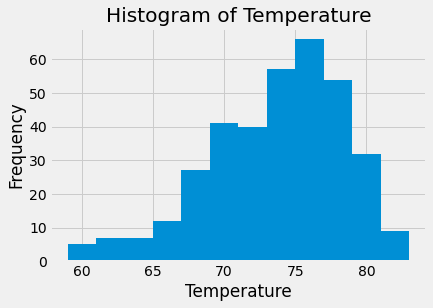

In [18]:
# Plotting the histogram with the last 12 months of temperature data with the most active station.
sel5 = [Measurement.station, func.max(Measurement.date), Measurement.tobs]
latest_date = session.query(*sel5).filter(Measurement.station=="USC00519281").all()

last_12_months = dt.date(2017, 8 ,18) - dt.timedelta(days=365)
last_12_months

results2 = session.query(Measurement.station, Measurement.date, Measurement.tobs).\
    filter(Measurement.station=="USC00519281").filter(Measurement.date >= last_12_months).all()


df2 = pd.DataFrame(results2, columns=['station','date', 'temperature'])
group_df2 = df2.sort_values("date")
group_df2 = group_df2.drop(columns='station')
group_df2 

group_df2.hist(column='temperature',bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title("Histogram of Temperature")


In [19]:
# Closing the Session
session.close()